<a href="https://colab.research.google.com/github/Christinastalin/DataScience-/blob/main/AirBnb_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries required for EDA and Visualisation. And Loading the dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('/content/Airbnb_data.csv')
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, -1].values


In [4]:
dataset.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
dataset.shape

(48895, 16)

EDA on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

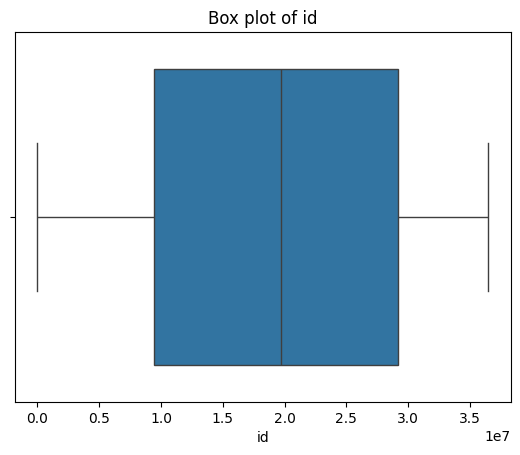

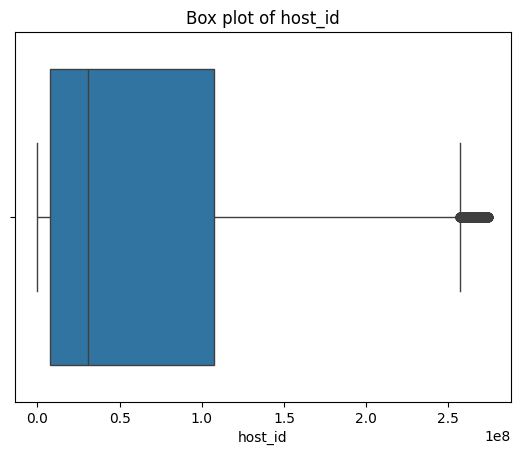

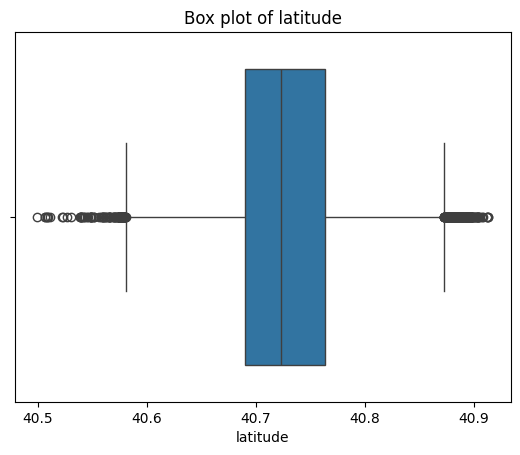

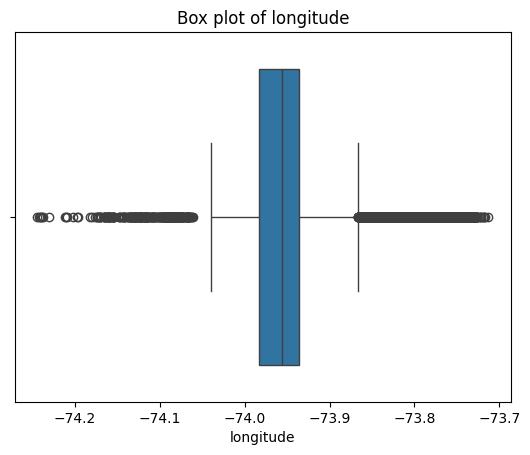

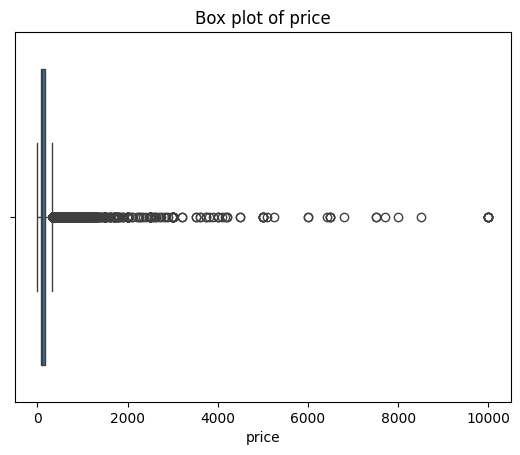

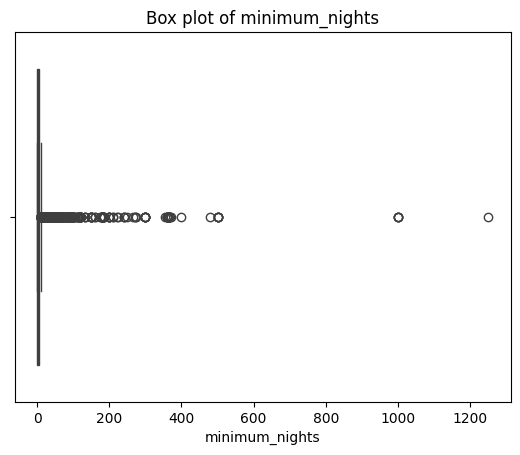

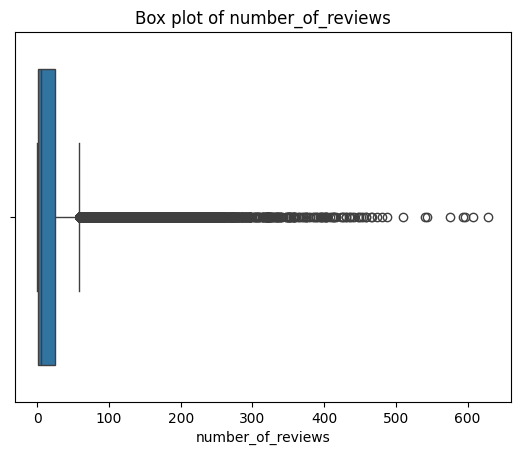

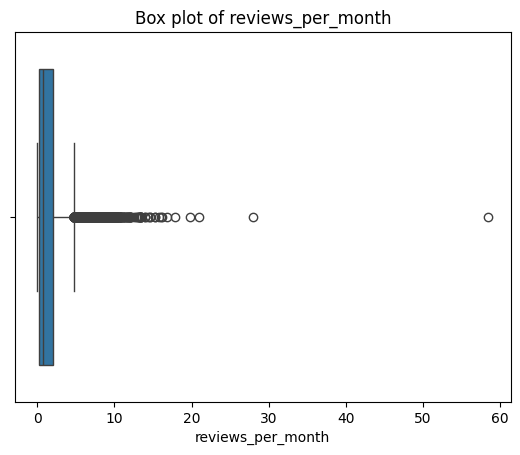

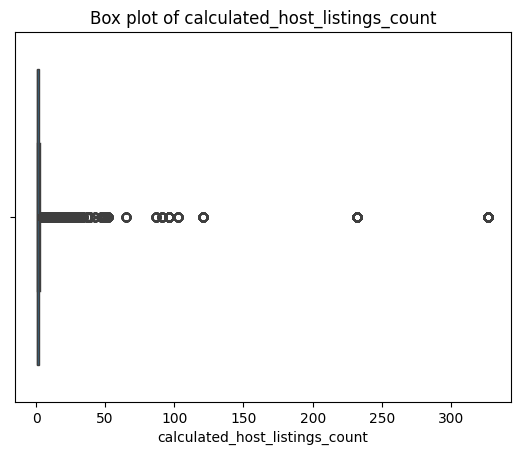

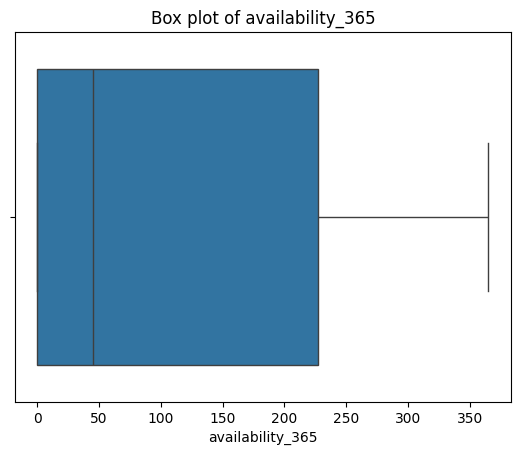

In [4]:
# prompt: EDA on dataset
dataset.info()
dataset.describe()
# Check for missing values
dataset.isnull().sum()


# Box plots to identify outliers
for column in dataset.select_dtypes(include=np.number):
  plt.figure()
  sns.boxplot(x=dataset[column])
  plt.title(f'Box plot of {column}')
plt.show()


In [5]:
#Dropping duplicate rows if any
dataset.duplicated().sum()
dataset.drop_duplicates(inplace=True)

In [6]:
#Handling Missing Values

dataset.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [7]:
dataset['name'].fillna('unknown',inplace=True)
dataset['host_name'].fillna('unknown',inplace=True)
dataset[['host_name','name']].isnull().sum()

,0
host_name,0
name,0


In [9]:
#Dropping the less important column with missing values
dataset.drop('last_review',axis=1,inplace=True)

KeyError: "['last_review'] not found in axis"

In [19]:
#Filling value in reviews_per_month col for missing values
dataset['reviews_per_month'].fillna(0,inplace=True)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [11]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


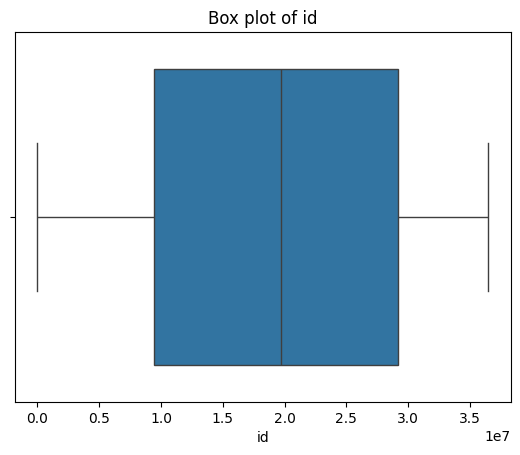

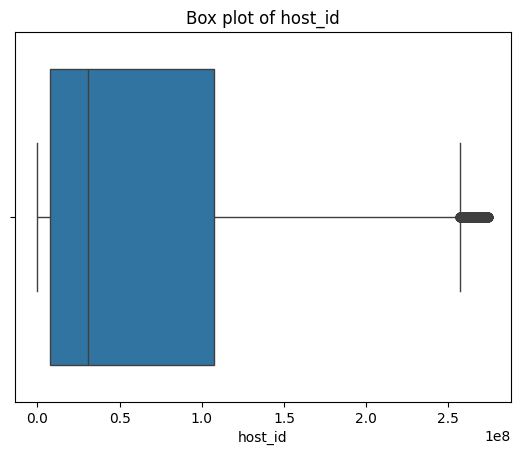

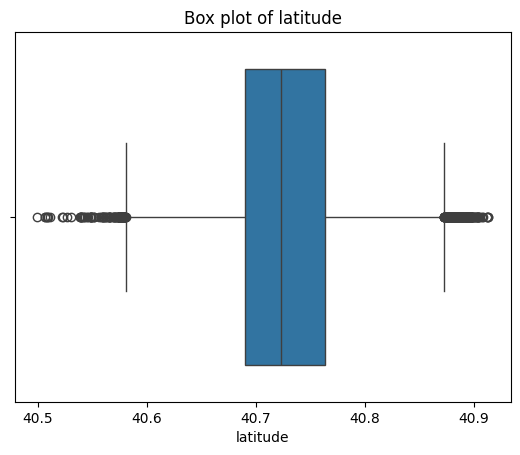

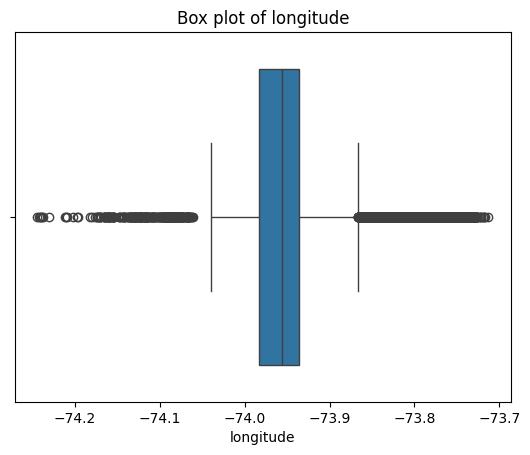

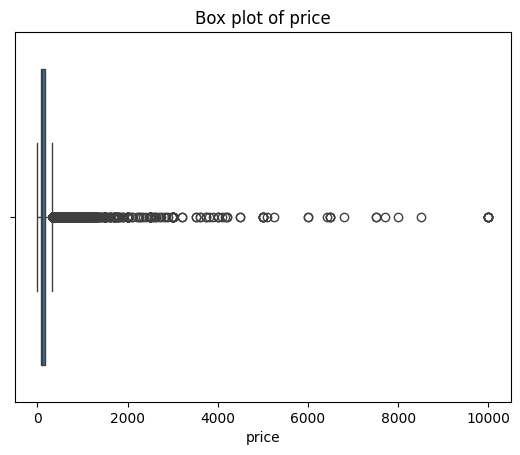

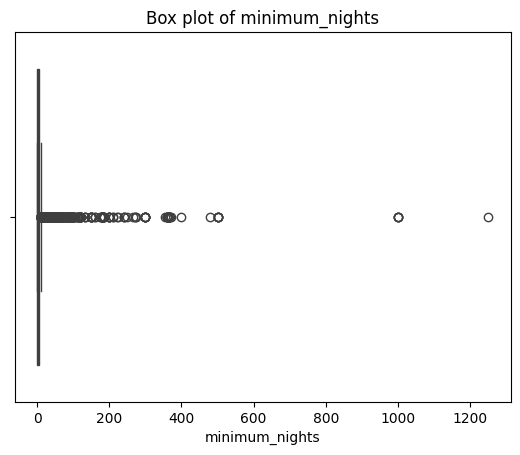

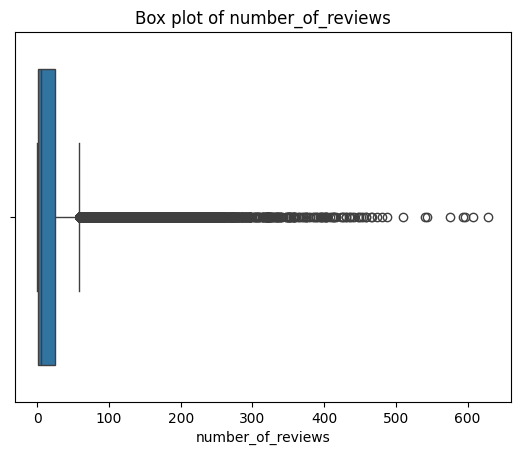

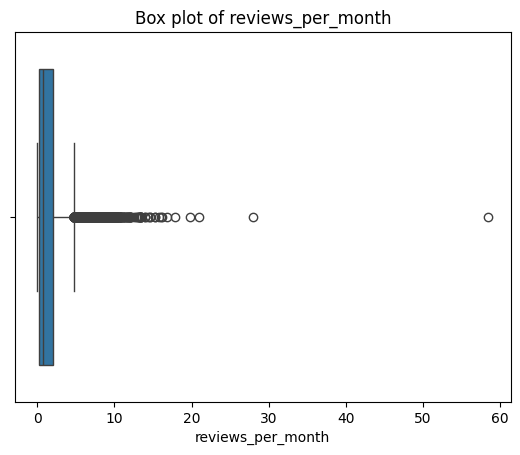

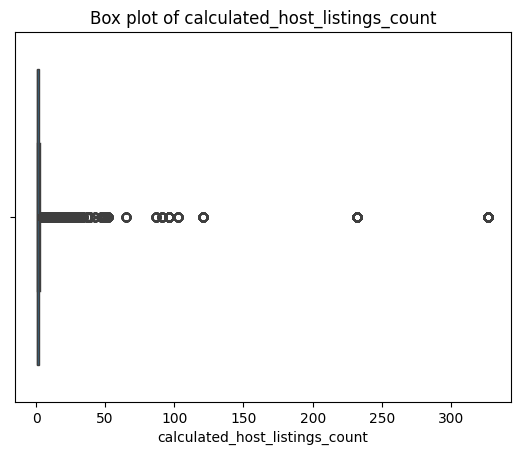

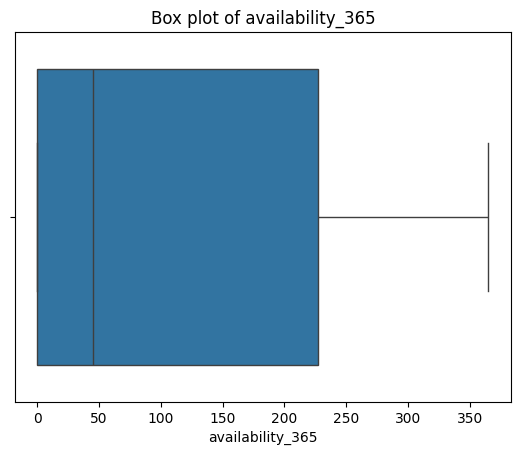

In [12]:
#Outlier analysis
for column in dataset.select_dtypes(include=np.number):
  plt.figure()
  sns.boxplot(x=dataset[column])
  plt.title(f'Box plot of {column}')
plt.show()

In [13]:
#Remove Outliers from price column
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dataset = dataset[(dataset['price'] >= lower_bound) & (dataset['price'] <= upper_bound)]



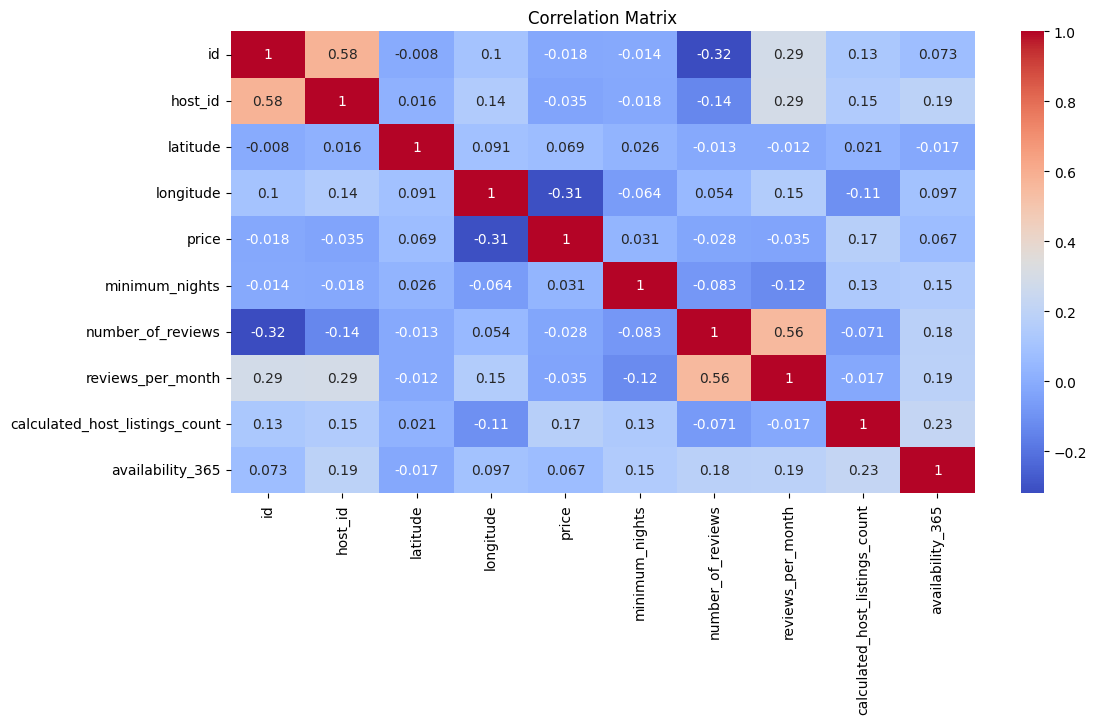

In [14]:
#Correlation Analysis
numeric_dataset = dataset.select_dtypes(include=np.number) # Select only numeric columns
corr_matrix = numeric_dataset.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

 When it's OK to replace nulls with zero in price column:
The null values actually represent "no cost" or "free".

You’re preparing the data for a machine learning model, and you don’t want nulls to break your training pipeline.

The number of nulls is small, and zero won’t bias the analysis heavily.

You're doing a temporary placeholder before more accurate imputation.

🚫 When you might want to avoid it:
If nulls actually mean "price unknown" rather than zero.

It can skew averages/aggregates — e.g., mean price drops if many nulls become zeros.

For financial or business-sensitive decisions, it may be misleading.

✅ Better alternatives (depending on the context):
Impute using mean/median/mode of the column.

Use a separate "missing" category if the column is categorical.

Add an indicator column like price_was_missing to preserve the info.

👉 Code Example in Pandas:
python
Copy
Edit
# Replace NaNs in price column with zero
df['price'] = df['price'].fillna(0)

# OR with median value
df['price'] = df['price'].fillna(df['price'].median())

# Track which rows had missing price
df['price_was_missing'] = df['price'].isna()

In [18]:
# Calculating Avg price of each room type
dataset.groupby('room_type')['price'].mean()

,price
room_type,
Entire home/apt,162.527096
Private room,79.018503
Shared room,59.293497


In [19]:
#Calculating Median and std of each room type
dataset.groupby('room_type')['price'].agg(['median', 'std'])

,median,std
room_type,,
Entire home/apt,150.0,63.383781
Private room,70.0,41.177512
Shared room,45.0,42.832023


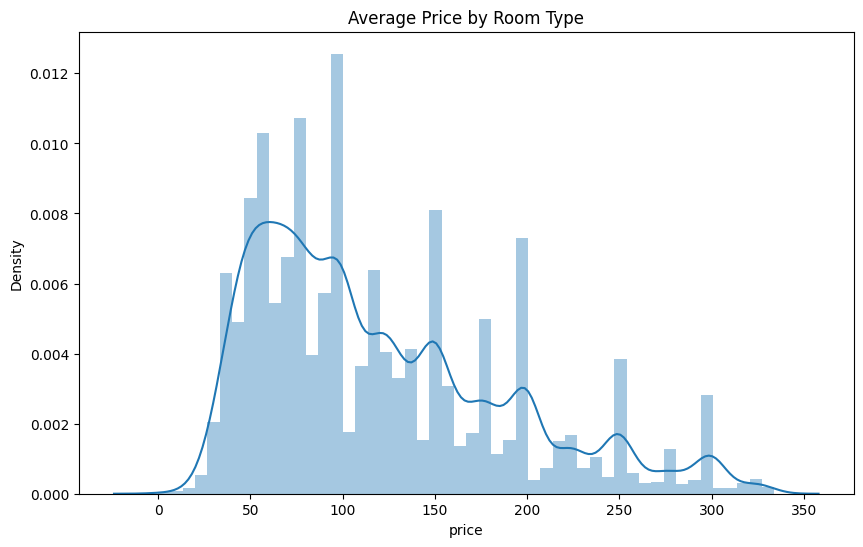

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(dataset['price'])
plt.show()

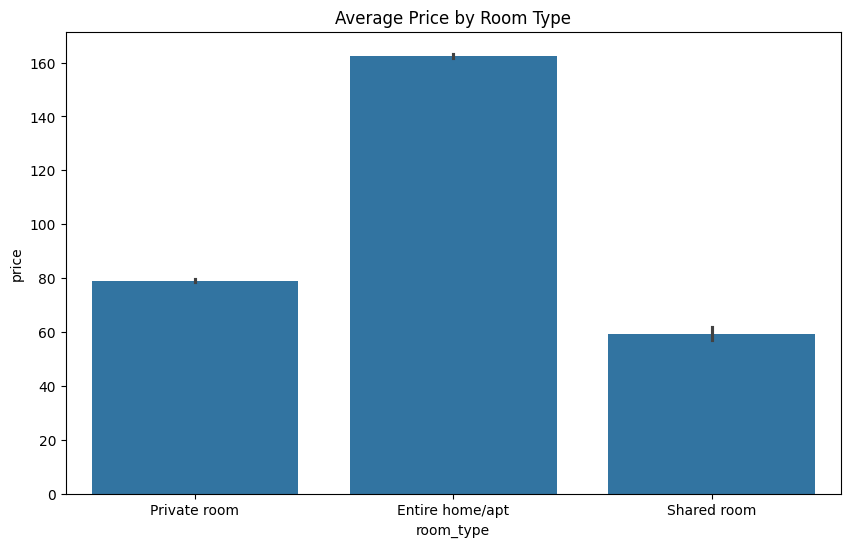

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='room_type',y='price',data=dataset)
plt.title('Average Price by Room Type')
plt.show()

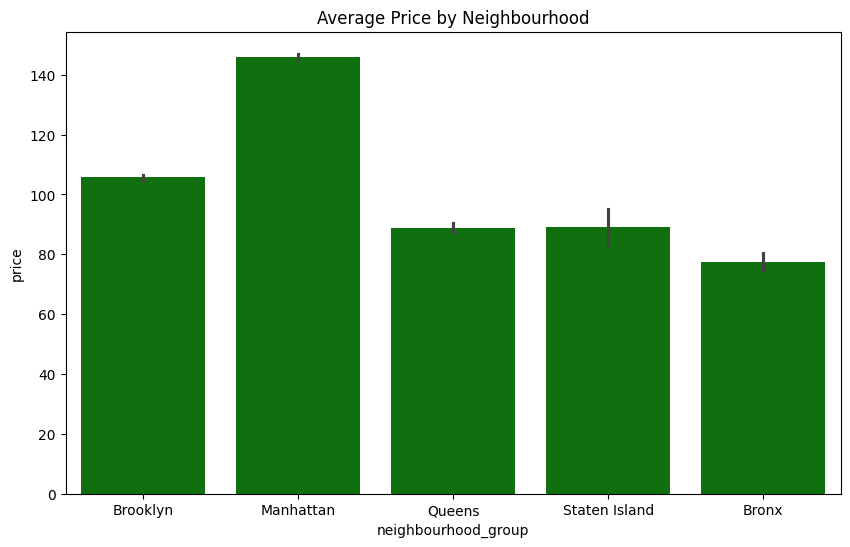

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='neighbourhood_group',y='price',data=dataset,color = 'green')
plt.title('Average Price by Neighbourhood')
plt.show()

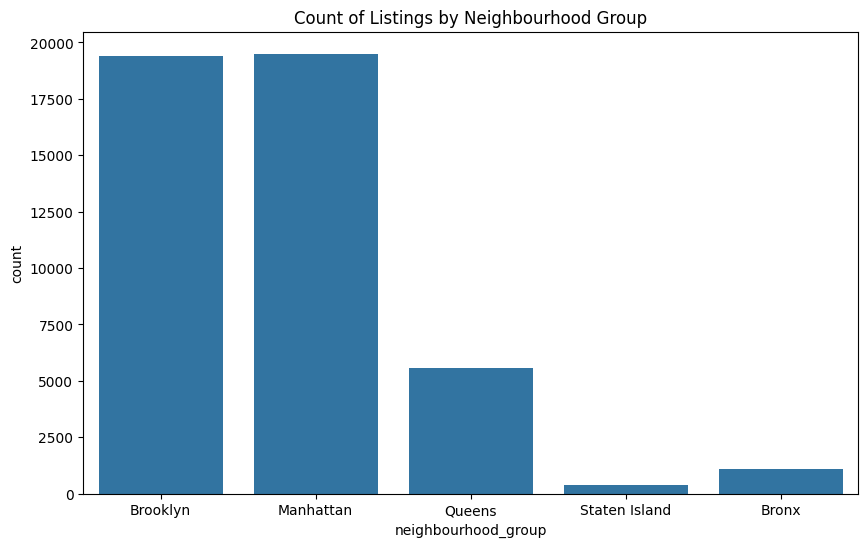

In [27]:
#Plotting the count of listings in neighbourhood_group
plt.figure(figsize=(10,6))
sns.countplot(x='neighbourhood_group',data=dataset)
plt.title('Count of Listings by Neighbourhood Group')
plt.show()

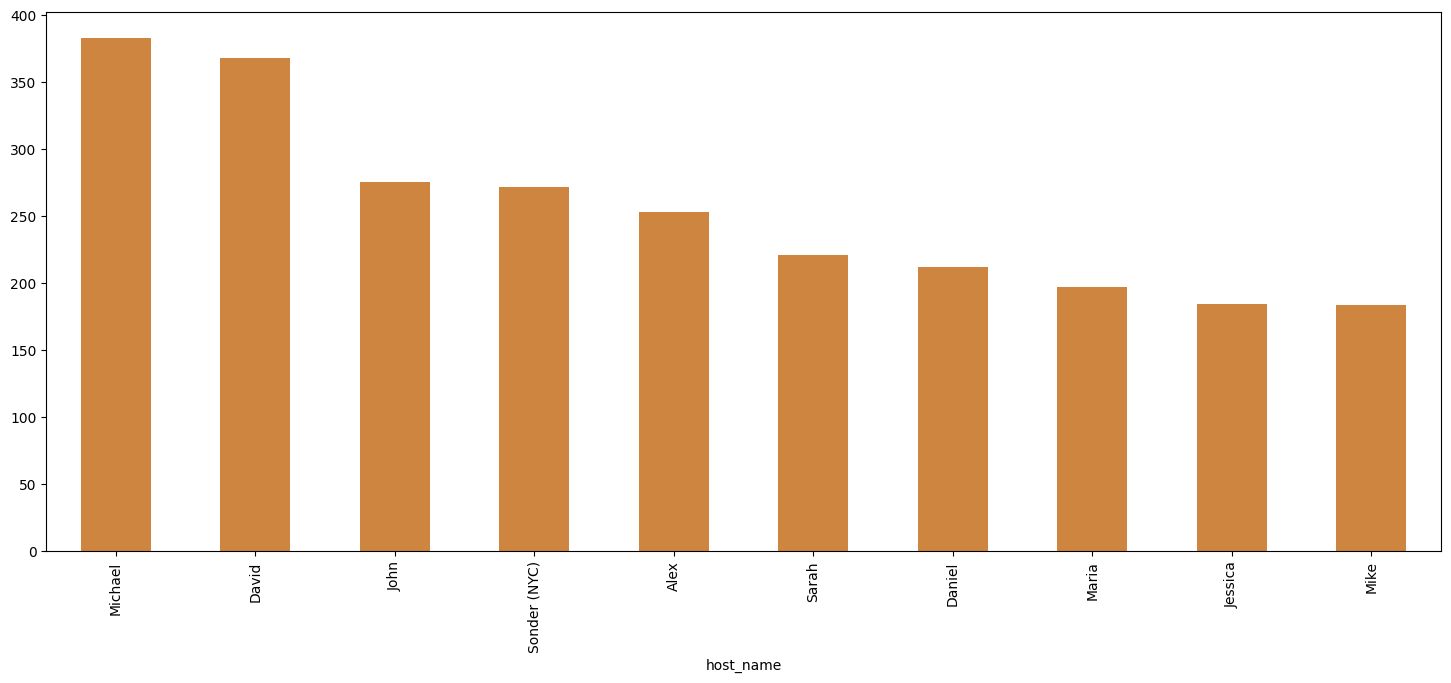

In [29]:
top_hosts = dataset['host_name'].value_counts()[:10]
top_hosts.plot(kind = 'bar', color = 'peru', figsize = (18,7))
plt.show()

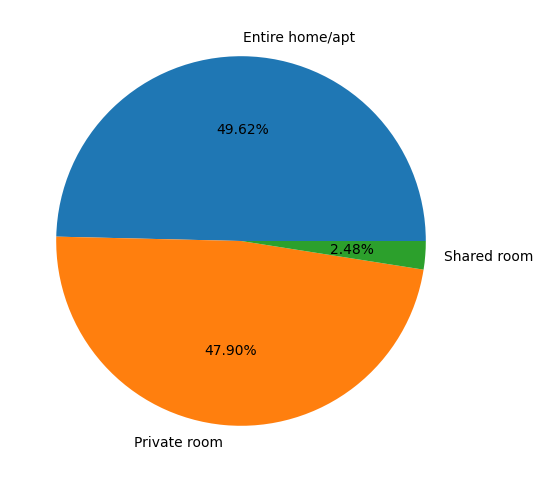

In [31]:
plt.figure(figsize = (12,6))
room_type = dataset['room_type'].value_counts()
labels = room_type.index
sizes = room_type.values
plt.pie(sizes, labels = labels, autopct = '%1.2f%%')
plt.show()

''' Business Conclusion
1. Manhattan and Brooklyn have highest demand.
2. Brooklyn as compared to Manhattan has cheaper price
3. Data Suggests that Airbnb rentals are used for short stays
4. Majority of Listing are having entire home or private rooms -- good option to chooose'''